In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data cleaning

In [6]:
#dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(10)

,v1,v2
2747,ham,Ya had just now.onion roast.
687,ham,"Dear,Me at cherthala.in case u r coming cochin..."
1039,ham,They just talking thats it de. They wont any o...
4692,ham,Tessy..pls do me a favor. Pls convey my birthd...
2174,ham,See? I thought it all through
1760,ham,Nt yet chikku..simple habba..hw abt u?
3306,ham,Set a place for me in your heart and not in yo...
4787,ham,Thanx. Yup we coming back on sun. Finish dinne...
768,ham,I cant pick the phone right now. Pls send a me...
121,ham,here is my new address -apples&pairs&all that ...


In [8]:
#renaming the columns now
df.rename(columns={'v1':'target','v2':'text'},inplace=True);
df.sample(10)

,target,text
1881,ham,Ok.. ÌÏ finishing soon?
4122,ham,"Cool, want me to go to kappa or should I meet ..."
1304,ham,Your right! I'll make the appointment right now.
707,ham,Quite late lar... Ard 12 anyway i wun b drivin...
648,ham,No prob. I will send to your email.
156,ham,I'm leaving my house now...
968,ham,Are you willing to go for aptitude class.
1144,ham,Really... I tot ur paper ended long ago... But...
2909,ham,How do you guys go to see movies on your side.
1325,ham,Yeah jay's sort of a fucking retard


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
#converting HAM:0
#SPAM:1
df['target']=le.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#duplicates
df.duplicated().sum()

403

In [13]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [17]:
import matplotlib.pyplot as plt

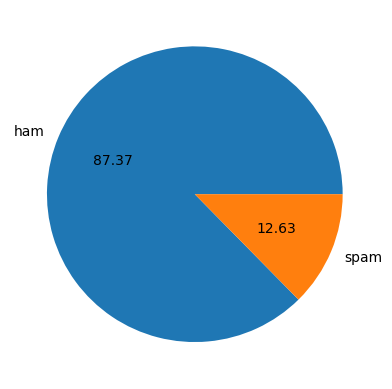

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
#data is imbalanced right now

In [20]:
import nltk 

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanik_qfjkecq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#tokenising in words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [26]:
#adding a columns to keep a count of number of words in a row
df['num_counts']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
#adding a column to keep track of the number of sentences in each word

In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_counts,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_counts','num_sentences']].describe()

,num_characters,num_counts,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#doing for ham
df[df['target']==0][['num_characters','num_counts','num_sentences']].describe()

,num_characters,num_counts,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
df[df['target']==1][['num_characters','num_counts','num_sentences']].describe()

,num_characters,num_counts,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
#some observations
#mean number of characters ,words and sentences is more in spam

In [35]:
import seaborn as sns

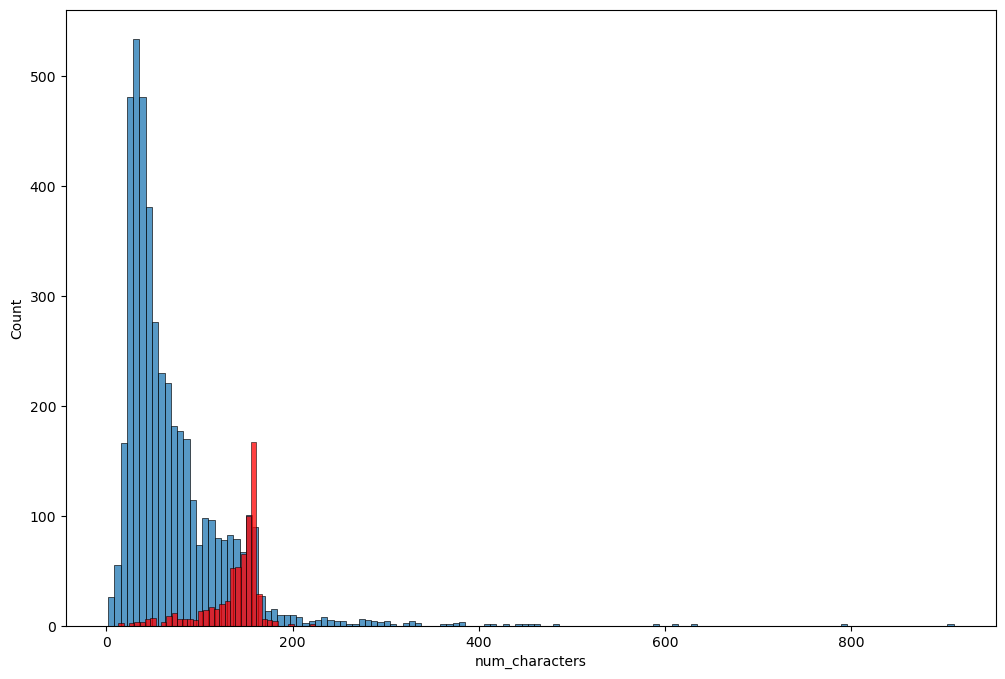

In [36]:
#plotting histograms for both cases on this plot
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

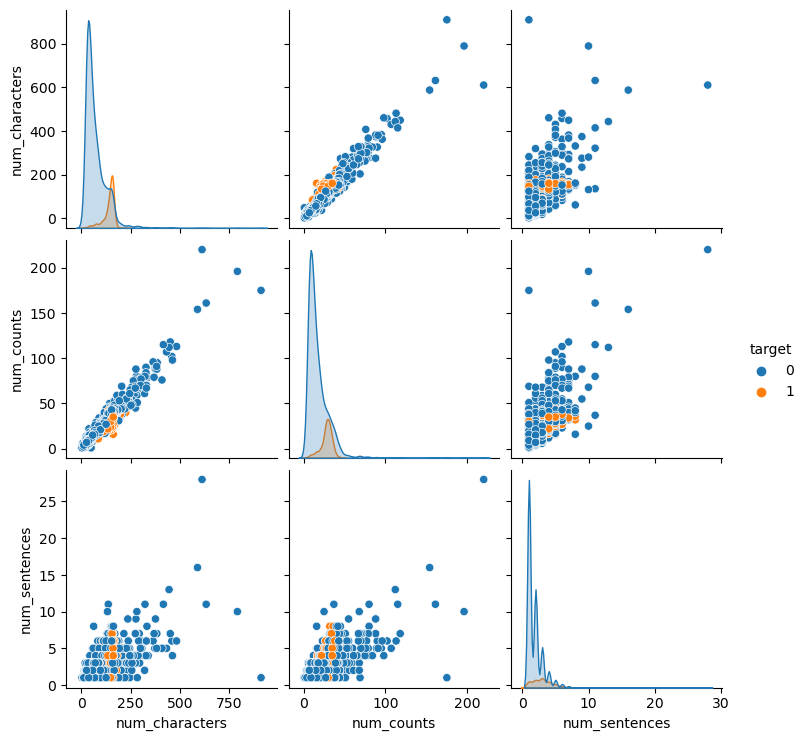

In [37]:
sns.pairplot(df,hue='target')

In [38]:
df.corr()

C:\Users\kanik_qfjkecq\AppData\Local\Temp\ipykernel_25168\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_counts,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_counts,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


C:\Users\kanik_qfjkecq\AppData\Local\Temp\ipykernel_25168\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

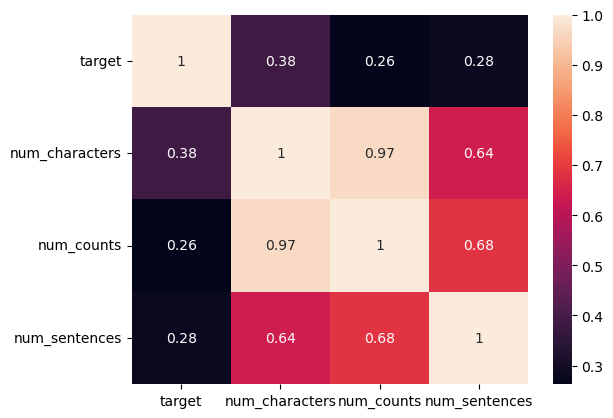

In [39]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

1.Lower Case
2.Tokenisation
3.Removing special characters
4.Removing stop words and punctuation 
5.Stemming

In [40]:
#lower case, tokenisation and removing special characters
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    return y

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanik_qfjkecq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords

In [43]:
import string 
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [44]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()    
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [45]:
transform_text('Making a new project in ML internship to detect spam messages. Made by Kanika Jain')

'make new project ml internship detect spam messag made kanika jain'

In [46]:
df['transformed_text']=df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_counts,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
df.describe()

,target,num_characters,num_counts,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
from wordcloud import WordCloud 
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

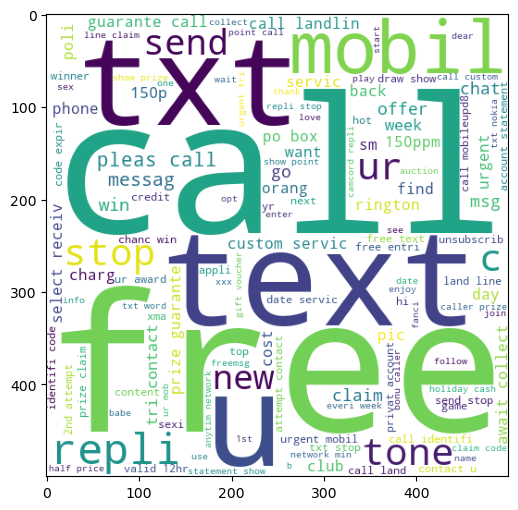

In [51]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

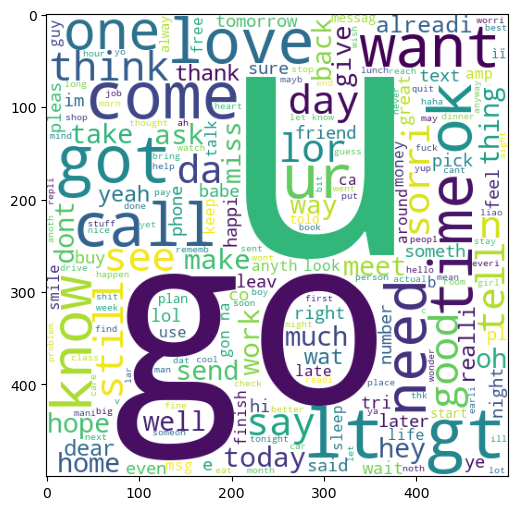

In [52]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [53]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [54]:
from collections import Counter

In [55]:
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

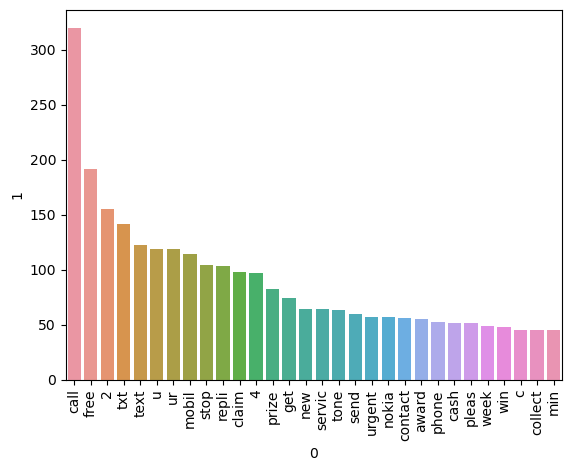

In [56]:
sns.barplot(x=0,y=1,data=pd.DataFrame(Counter(spam_corpus).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35394

In [58]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

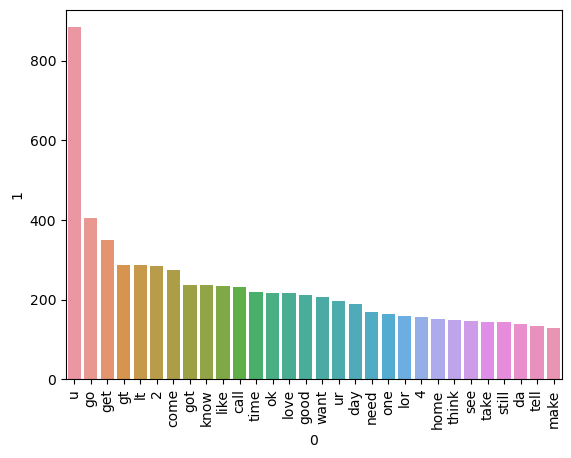

In [59]:
sns.barplot(x=0,y=1,data=pd.DataFrame(Counter(ham_corpus).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()

# Model building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [61]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [62]:
X.shape

(5169, 6708)

In [63]:
y=df['target'].values

In [64]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [68]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)

GaussianNB()

In [70]:
y_predict1=gnb.predict(X_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [71]:
mnb.fit(X_train,y_train)
y_predict2=mnb.predict(X_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [72]:
bnb.fit(X_train,y_train)
y_predict3=bnb.predict(X_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [74]:
lr.fit(X_train,y_train)
y_predict_lr=lr.predict(X_test)
print(accuracy_score(y_test,y_predict_lr))
print(confusion_matrix(y_test,y_predict_lr))
print(precision_score(y_test,y_predict_lr))


0.9787234042553191
[[895   1]
 [ 21 117]]
0.9915254237288136


In [75]:
from sklearn.svm import SVC
svm=SVC()

In [76]:
svm.fit(X_train,y_train)
y_predict_svm=svm.predict(X_test)
print(accuracy_score(y_test,y_predict_svm))
print(confusion_matrix(y_test,y_predict_svm))
print(precision_score(y_test,y_predict_svm))

0.9709864603481625
[[895   1]
 [ 29 109]]
0.990909090909091
